In [1]:
import keras

In [5]:
!cat /Users/hotoku/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}

<AxesSubplot:>

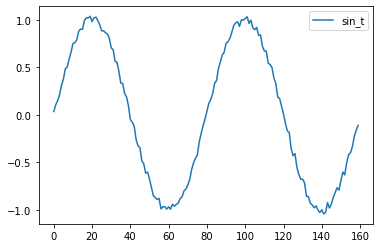

In [7]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline

random.seed(0)
random_factor = 0.05
steps_per_cycle = 80
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * 2 * math.pi / steps_per_cycle) +
                         random.uniform(-01.0, 1.0) * random_factor)
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [11]:
def _load_data(data, n_prev = 100):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].values)
        docY.append(data.iloc[i+n_prev].values)
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev=100):
    ntrn = int(round(len(df) * (1-test_size)))
    X_train, Y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, Y_test = _load_data(df.iloc[ntrn:], n_prev)
    return (X_train, Y_train), (X_test, Y_test)

In [12]:
length_of_sequence = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev=length_of_sequence)

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

In [35]:
in_out_neurons = 1
hidden_neurons = 300
model = Sequential()
model.add(LSTM(hidden_neurons, input_shape=(100, 1)))
model.add(Dense(1))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 300)               362400    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer="adam",
    metrics=["mean_squared_error"]
)
model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=20, epochs=3
)

Epoch 1/3
176/176 [==============================] - 12s 70ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/3
176/176 [==============================] - 12s 69ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 3/3
176/176 [==============================] - 13s 73ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


In [40]:
X_train.shape

(3501, 100, 1)

In [41]:
import matplotlib.pyplot as plt

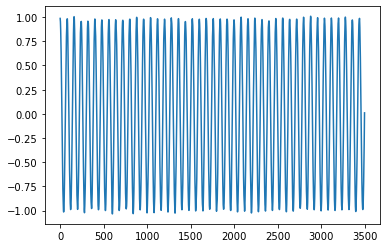

In [43]:
y_hat = model.predict(X_train)
plt.plot(y_hat)